### **News Article Classification Task using SOTA models**

<img src="https://github.com/pathakchiranjit/Natural-languge-Processing/blob/main/pics/title.jpg?raw=true" align='center'><br/>


**Data Source:**

[Popular News classification dataset](https://www.kaggle.com/rmisra/news-category-dataset)

**Context**

This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from [HuffPost](https://www.huffpost.com/). 

The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.


**Brief History of NLP world**

While there are plenty of articles on the internet about the **state of the art BERT** algorithm and its applications , its probably also important to understand the journey of the Natural Language Processing science from a rather primitive form to what it is now. There has been fair number of milestones in the way in form of novel techniques ranging from embedding techniques, improved language models, neural architectures and so on.

<img src="https://github.com/pathakchiranjit/Natural-languge-Processing/blob/main/pics/NLP_models.png?raw=true" align='center'><br/>

**BERT and its natives**

Google’s BERT and recent transformer-based methods have taken the NLP landscape by a storm, outperforming the state-of-the-art on several tasks.

[BERT](https://arxiv.org/abs/1810.04805) is a bi-directional transformer for pre-training over a lot of unlabeled textual data to learn a language representation that can be used to fine-tune for specific machine learning tasks.

[XLNet](https://arxiv.org/abs/1906.08237) is a large bidirectional transformer that uses improved training methodology, larger data and more computational power to achieve better than BERT prediction metrics on 20 language tasks.

[RoBERTa](https://arxiv.org/pdf/1907.11692.pdf) Introduced at Facebook, Robustly optimized BERT approach RoBERTa, is a retraining of BERT with improved training methodology, 1000% more data and compute power.

[DistilBERT](https://arxiv.org/pdf/1910.01108.pdf) learns a distilled (approximate) version of BERT, retaining 97% performance but using only half the number of parameters (paper). Specifically, it does not has token-type embeddings, pooler and retains only half of the layers from Google’s BERT. DistilBERT uses a technique called distillation, which approximates the Google’s BERT, i.e. the large neural network by a smaller one.

<img src="https://github.com/pathakchiranjit/Natural-languge-Processing/blob/main/pics/model_descriptions.png?raw=true" align='center'><br/>

## Table of Contents

1. [Objective: Problem Statement](#section1)<br>
2. [Tools : Importing Packages, Libraries & Defining Functions:](#section2)<br>
  - 2.1 [Import Packages and Libraries:](#section201)<br>
  - 2.2 [Defining Functions :](#section202)<br>
    - 2.2.1 [missing_data : To find missing values in dataset](#section2021)<br>
    - 2.2.2 [stratified_sample : to sample from dataset with proper proportion of all classes/categories](#section2022)<br>
    - 2.2.3 [creat_bert_input_features : Preparing dataset features for BERT to perform](#section2023)<br>
    - 2.2.4 [creat_dist_bert_input_features : Preparing dataset features for DistilBERT to perform](#section2024)<br>
    - 2.2.5 [remove_patterns and preprocess_text : for preprocessing the text data and clean](#section2025)<br>
3. [Collecting & Loading Data](#section3)<br>
  - 3.1 [ Import dataset from G-Drive](#section301)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Merging similar topics together](#section401)<br>
  - 4.2 [Stratified Sample of dataframe for model building](#section402)<br>
  - 4.3 [Data Cleaning and Preprocessing](#section403)<br>
  - 4.4 [Preparing the Train, Validation and Test data](#section404)<br>
5. [Model Building and Testing](#section5)<br>
  - 5.1 [Using BERT pretrained model : as embedding layer followed by multiclass classification using shallow Neural Network](#section501)<br>
  - 5.2 [Using DistilBERT pretrained model : as embedding layer followed by multiclass classification using shallow Neural Network](#section502)<br>
6. [Conclusion](#section6)<br>
7. [Actionable Insights:](#section7)
8. [Limitation of the study:](#section8)

<a id=section1></a>
## 1. Problem Statement

To classify the **News article** based on **title** and **short-description**

<a id=section2></a>
## 2. Tools : Importing Packages, Libraries & Defining Functions:





### 2.1 Import Packages and Libraries:

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5567649180729122324
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13514867415358635760
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Feb 27 10:03:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    31W / 250W |    375MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import *
print("Cores==",cpu_count())
ram_gb = virtual_memory().total / 1024 /1024/1024
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Cores== 2
Your runtime has 12.7 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
!pip install transformers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import transformers
import tqdm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("TF Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF Version:  2.8.0
Eager mode:  True
TF Hub version:  0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [8]:
# Important libraries
import pandas as pd
import numpy as np
import re # to use regular expression pattern 
import datetime as dt  # to parse to datetime
import string
from scipy import stats
from collections import defaultdict

#for data preprocessing
from sklearn.model_selection import train_test_split  

# to evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# for visualization
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams
import seaborn as sns 
%matplotlib inline

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import tensorflow as tf

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.2 Defining Functions :

### 2.2.1 missing_data : To find missing values in dataset.

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

### 2.2.2 stratified_sample : to sample from dataset with proper proportion of all classes/categories

In [13]:
# the functions:
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    '''
    It samples data from a pandas dataframe using strata. These functions use
    proportionate stratification:
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    :seed: sampling seed
    :keep_index: if True, it keeps a column with the original population index indicator
    
    Returns
    -------
    A sampled pandas dataframe based in a set of strata.
    Examples
    --------
    >> df.head()
    	id  sex age city 
    0	123 M   20  XYZ
    1	456 M   25  XYZ
    2	789 M   21  YZX
    3	987 F   40  ZXY
    4	654 M   45  ZXY
    ...
    # This returns a sample stratified by sex and city containing 30% of the size of
    # the original data
    >> stratified = stratified_sample(df=df, strata=['sex', 'city'], size=0.3)
    Requirements
    ------------
    - pandas
    - numpy
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
        
        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)
    
    return stratified_df



def stratified_sample_report(df, strata, size=None):
    '''
    Generates a dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Returns
    -------
    A dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd


def __smpl_size(population, size):
    '''
    A function to compute the sample size. If not informed, a sampling 
    size will be calculated using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Parameters
    ----------
        :population: population size
        :size: sample size (default = None)
    Returns
    -------
    Calculated sample size to be used in the functions:
        - stratified_sample
        - stratified_sample_report
    '''
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

### 2.2.3 creat_bert_input_features : Preparing dataset features for BERT to perform.

In [14]:
def create_bert_input_features(tokenizer, docs, max_seq_length):
    
    all_ids, all_masks, all_segments= [], [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):
        
        tokens = tokenizer.tokenize(doc)
        
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)
        
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
            
        segments = [0] * max_seq_length
        all_ids.append(ids)
        all_masks.append(masks)
        all_segments.append(segments)
        
    encoded = np.array([all_ids, all_masks, all_segments])
    
    return encoded

### 2.2.4 creat_dist_bert_input_features : Preparing dataset features for DistilBERT to perform.

In [15]:
def create_dist_bert_input_features(tokenizer, docs, max_seq_length):
    
    all_ids, all_masks = [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):
        
        tokens = tokenizer.tokenize(doc)
        
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)
        
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
            
        all_ids.append(ids)
        all_masks.append(masks)
        
    encoded = np.array([all_ids, all_masks])
    
    return encoded

### 2.2.5 remove_patterns and preprocess_text : for preprocessing the text data and clean

In [16]:
def remove_pattern(text):
    # patterns to be extracted and to be removed from the data 
    emoji = "[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF\U000024C2-\U0001F251]+"
    url= re.compile("https?://\S+|www\.\S+")                     # pattern for url
    html= r'<.*?>'                                               # pattern for html tag
    num_with_text= r"\S*\d+\S*"                                  # pattern for digit 
    reuters= r"(\s\(Reuters\))"                                  # pattern to detect Reuters, it is common word in true news
    punctuation= r"[#@&%$~=\.;:\?,(){}\"\“\”\‘\'\*!\+`^<>\[\]\-/]+"      #pattern for punctuations and special characters   
    apostroph=r"\’s?"
    # collect the patterns 
    patterns=[emoji, url, html, num_with_text, apostroph,reuters,punctuation] # punctuation removed

    for pattern in patterns:
          new= re.sub(pattern, "", text)
          text= new 
    return text.lower()

In [17]:
def preprocess_txt(df, cols):
  for col in cols:
    df[col] = df[col].apply(remove_pattern)
    #df[col] = df[col].apply(lambda x: [item for item in x if item not in stop_words])
  return df

<a id=section3></a>
## 3. Collection & Loading data:





### 3.1  Import dataset from G-Drive:

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
dataset = pd.read_json("/content/drive/MyDrive/GCDAI_Capstone_NLP_Project/Data/News_Category_Dataset_v2.json", lines = True)

In [20]:
dataset.head(3)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26


In [21]:
dataset.shape

(200853, 6)

In [22]:
dataset['category'].nunique()

41

In [23]:
dataset['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [24]:
dataset['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

<a id=section4></a>
## 4. Data Pre-processing:





### 4.1 Merging similar topics together 

In [25]:
df = dataset.copy()

In [26]:
# Merging of categories for nearest categories
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)
df.category = df.category.map(lambda x: "ARTS & CULTURE" if x == "ARTS" else x)
df.category = df.category.map(lambda x: "ARTS & CULTURE" if x == "CULTURE & ARTS" else x)
df.category = df.category.map(lambda x: "PARENTING" if x == "PARENTS" else x)
df.category = df.category.map(lambda x: "ENVIRONMENT" if x == "GREEN" else x)
df.category = df.category.map(lambda x: "STYLE & BEAUTY" if x == "STYLE" else x)
df.category = df.category.map(lambda x: "FOOD & DRINK" if x == "TASTE" else x)
df.category = df.category.map(lambda x: "WELLNESS" if x == "HEALTHY LIVING" else x)

In [27]:
df.shape

(200853, 6)

In [28]:
df['category'].nunique()

33

In [29]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTING',
       'ARTS & CULTURE', 'STYLE & BEAUTY', 'ENVIRONMENT', 'FOOD & DRINK',
       'WELLNESS', 'WORLDPOST', 'GOOD NEWS', 'FIFTY', 'HOME & LIVING',
       'DIVORCE', 'WEDDINGS', 'MONEY'], dtype=object)

In [30]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          24521
ENTERTAINMENT     16058
PARENTING         12632
STYLE & BEAUTY    11903
TRAVEL             9887
FOOD & DRINK       8322
QUEER VOICES       6314
WORLDPOST          6243
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
ENVIRONMENT        3945
ARTS & CULTURE     3878
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
RELIGION           2556
SCIENCE            2178
WORLD NEWS         2177
TECH               2082
MONEY              1707
FIFTY              1401
GOOD NEWS          1398
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64

In [31]:
cols = ["headline","short_description",  "category"]
#tst_cols = ["REF_NO", "headline","short_description"]

### 4.2 Stratified Sample of dataframe for model building 

In [32]:
news=stratified_sample(df[cols], ["category"],40000)
#test_set=test_set[tst_cols]
news.head(3)

,index,headline,short_description,category
0,194290,Charlotta Westergren's Stunning Exhibition 'Su...,The other paintings depict Biblical animals wi...,ARTS & CULTURE
1,187120,Theater and the University: Marriages and Misa...,If the relationship between the not-for-profit...,ARTS & CULTURE
2,109804,48 Hours With Delta Spirit and J.S Bach in NYC...,,ARTS & CULTURE


In [33]:
news['category'].value_counts()

POLITICS          6520
WELLNESS          4883
ENTERTAINMENT     3198
PARENTING         2516
STYLE & BEAUTY    2370
TRAVEL            1969
FOOD & DRINK      1657
QUEER VOICES      1257
WORLDPOST         1243
BUSINESS          1182
COMEDY            1031
SPORTS             973
BLACK VOICES       902
HOME & LIVING      835
ENVIRONMENT        786
ARTS & CULTURE     772
WEDDINGS           727
WOMEN              695
IMPACT             689
DIVORCE            682
CRIME              678
MEDIA              561
WEIRD NEWS         532
RELIGION           509
SCIENCE            434
WORLD NEWS         434
TECH               415
MONEY              340
FIFTY              279
GOOD NEWS          278
COLLEGE            228
LATINO VOICES      225
EDUCATION          200
Name: category, dtype: int64

In [34]:
news['category'].nunique()

33

In [35]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = news['category'].unique()
print(target_category)

['ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY' 'CRIME'
 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT' 'ENVIRONMENT' 'FIFTY'
 'FOOD & DRINK' 'GOOD NEWS' 'HOME & LIVING' 'IMPACT' 'LATINO VOICES'
 'MEDIA' 'MONEY' 'PARENTING' 'POLITICS' 'QUEER VOICES' 'RELIGION'
 'SCIENCE' 'SPORTS' 'STYLE & BEAUTY' 'TECH' 'TRAVEL' 'WEDDINGS'
 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']


### 4.3 Data Cleaning and Preprocessing

Regular expression patterns have been used to detect and remove emoji symbols, url links, html tags, special characters and punctuation marks.

In [36]:
news['text'] = news['headline'].str.cat(news['short_description'], sep =" ")

In [37]:
cols = ['text']

In [38]:
news = preprocess_txt(news,cols)

In [39]:
news['text'] = news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [40]:
news.drop_duplicates(['text'], keep='first',inplace=True)

In [41]:
#label encoding the categories. After this each category would be mapped to an integer.
encoder = LabelEncoder()
news['CategoryId'] = encoder.fit_transform(news['category'])

In [42]:
#news['CategoryId'] = news['category'].factorize()[0]
news.head()

,index,headline,short_description,category,text,CategoryId
0,194290,Charlotta Westergren's Stunning Exhibition 'Su...,The other paintings depict Biblical animals wi...,ARTS & CULTURE,charlotta westergrens stunning exhibition surv...,0
1,187120,Theater and the University: Marriages and Misa...,If the relationship between the not-for-profit...,ARTS & CULTURE,theater university marriages misalliances rela...,0
2,109804,48 Hours With Delta Spirit and J.S Bach in NYC...,,ARTS & CULTURE,hours delta spirit js bach nyc peter sellars b...,0
3,115332,"Streamsong Resort: Golf and Literature, Bass a...",,ARTS & CULTURE,streamsong resort golf literature bass alligators,0
4,108209,Doris Duke & Norton Simon: Kindred Spirits a W...,There are two names on my mind right now -- Do...,ARTS & CULTURE,doris duke norton simon kindred spirits world ...,0


In [43]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = news[['category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,category,CategoryId
0,ARTS & CULTURE,0
772,BLACK VOICES,1
1674,BUSINESS,2
2856,COLLEGE,3
3084,COMEDY,4
4115,CRIME,5
4793,DIVORCE,6
5475,EDUCATION,7
5675,ENTERTAINMENT,8
8873,ENVIRONMENT,9


In [44]:
len(category)

33

In [45]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category.values)
id_to_category = dict(category[['CategoryId', 'category']].values)
id_to_category

{0: 'ARTS & CULTURE',
 1: 'BLACK VOICES',
 2: 'BUSINESS',
 3: 'COLLEGE',
 4: 'COMEDY',
 5: 'CRIME',
 6: 'DIVORCE',
 7: 'EDUCATION',
 8: 'ENTERTAINMENT',
 9: 'ENVIRONMENT',
 10: 'FIFTY',
 11: 'FOOD & DRINK',
 12: 'GOOD NEWS',
 13: 'HOME & LIVING',
 14: 'IMPACT',
 15: 'LATINO VOICES',
 16: 'MEDIA',
 17: 'MONEY',
 18: 'PARENTING',
 19: 'POLITICS',
 20: 'QUEER VOICES',
 21: 'RELIGION',
 22: 'SCIENCE',
 23: 'SPORTS',
 24: 'STYLE & BEAUTY',
 25: 'TECH',
 26: 'TRAVEL',
 27: 'WEDDINGS',
 28: 'WEIRD NEWS',
 29: 'WELLNESS',
 30: 'WOMEN',
 31: 'WORLD NEWS',
 32: 'WORLDPOST'}

### Visulaizing the category data

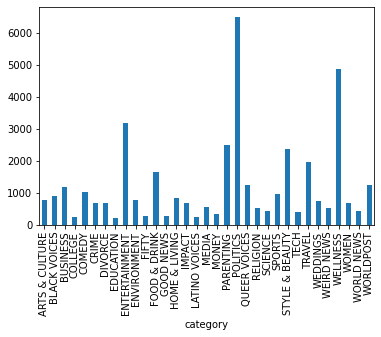

In [46]:
news.groupby('category').CategoryId.count().plot.bar(ylim = 0)

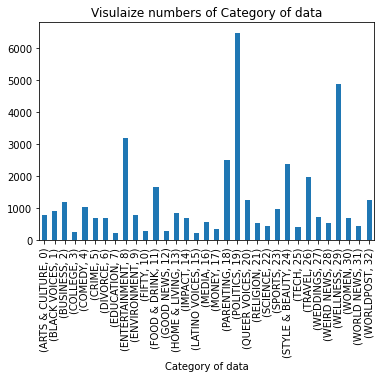

In [47]:
news.groupby('category').CategoryId.value_counts().plot(kind = "bar")
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

In [48]:
news.describe(include='all')

,index,headline,short_description,category,text,CategoryId
count,39924.000000,39924,39924,39924,39924,39924.000000
unique,NaN,39827,35813,33,39924,NaN
top,NaN,Weekly Roundup of eBay Vintage Clothing Finds ...,,POLITICS,charlotta westergrens stunning exhibition surv...,NaN
freq,NaN,12,3896,6498,1,NaN
mean,100500.593928,NaN,NaN,NaN,NaN,17.947024
std,58006.984675,NaN,NaN,NaN,NaN,8.992435
min,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,50084.750000,NaN,NaN,NaN,NaN,11.000000
50%,100523.000000,NaN,NaN,NaN,NaN,19.000000
75%,150704.500000,NaN,NaN,NaN,NaN,26.000000


In [49]:
cols=['index',	'text',	'category',	'CategoryId']

In [50]:
# copy the news to data_brt split into training, validating and test set
news= news[cols] 

In [51]:
missing_data(news)

,Total,Percent
index,0,0.0
text,0,0.0
category,0,0.0
CategoryId,0,0.0


In [52]:
news.head(3)

,index,text,category,CategoryId
0,194290,charlotta westergrens stunning exhibition surv...,ARTS & CULTURE,0
1,187120,theater university marriages misalliances rela...,ARTS & CULTURE,0
2,109804,hours delta spirit js bach nyc peter sellars b...,ARTS & CULTURE,0


In [53]:
n_class = news.category.nunique()

In [54]:
n_class

33

In [55]:
news['CategoryId']

0         0
1         0
2         0
3         0
4         0
         ..
39995    32
39996    32
39997    32
39998    32
39999    32
Name: CategoryId, Length: 39924, dtype: int64

### 4.4 Preparing the Train, Validation and Test data

In [56]:
#train_data, validate_data, test_data (70%, 15%, 15% respectively)
train_data, validate_data, test_data= np.split(news.sample(frac=1, random_state=42), [ int(.7*len(news)), int(.85*len(news))])

In [57]:
train_data.shape, validate_data.shape, test_data.shape

((27946, 4), (5989, 4), (5989, 4))

<a id=section4></a>
## 5. Model Building and Testing





### 5.1 Using BERT pretrained model : as embedding layer followed by multiclass classification using shallow Neural Network

In [58]:
# uncased version of BERT
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [59]:
tokenizer = transformers.BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [60]:
sample_txt=train_data.iloc[1,1]
sample_txt

'tv networks unite fight trump restriction journalists access network tv news representatives confer monday hash demands access donald trump presidential campaign'

In [61]:
# tokenizing sample text from training data 
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=30,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation=True # to truncate excess tokens to meet the maximum length
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

Parameter explanation : 

*  max_length: has integer value to pass sequency of constance length, controls the length for padding/truncation
*  add_special_tokens: has boolean value  to add special  tokens such as [CLS] to add at the start of each sentence and [SEP] to mark ending of a sentence. 
*   return_token_type_ids: has boolean value to whether to return token type IDs(list of token type ids to be fed to a model).
*   padding: activates and control padding. If set to 'max_length' pad to a maximum length specified with the argument max_length.Creats array of 0s (pad token) and 1s (real token) called attention mask
*   return_attention_mask: Whether to return the attention mask, indicates to the model which tokens should be attended to, and which should not.
*   return_tensors:  Can be set to ‘tf’, ‘pt’ or ‘np’ to return TensorFlow tf.constant, PyTorch torch.Tensor or Numpy, respectively.
*   truncation: has boolean value to control truncation



For more parameters and detailed explanations please refere [here](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer).  




In [62]:
encoding["input_ids"]

tensor([[  101,  2694,  6125, 15908,  2954,  8398, 16840,  8845,  3229,  2897,
          2694,  2739,  4505,  9530,  7512,  6928, 23325,  7670,  3229,  6221,
          8398,  4883,  3049,   102,     0,     0,     0,     0,     0,     0]])

In [63]:
encoding["attention_mask"]# shows 1 for real token and 0 for pad tokens 

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0]])

**Set the maximum length for our training data**

In [64]:
token_length=[] # place holder to count the number of tokens in news 
for ttl in validate_data.text:
  tokens = tokenizer.encode(ttl, max_length=90, truncation=True)
  token_length.append(len(tokens)) # list of token count of each news title

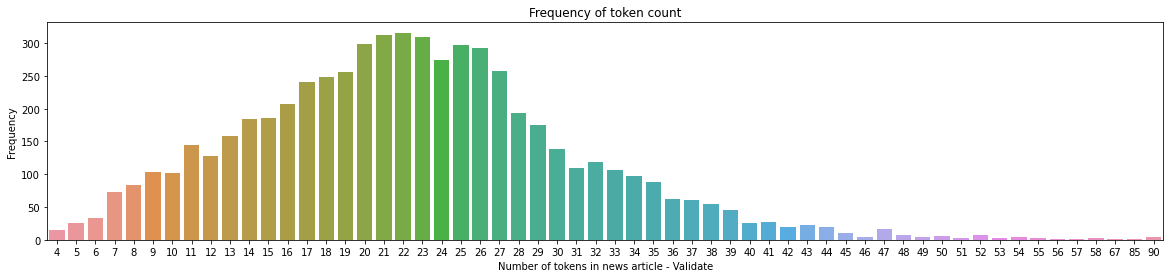

In [65]:
plt.figure(figsize=(20,4))
#sns.distplot(token_length)
sns.countplot(token_length)
plt.title("Frequency of token count")
plt.xlabel("Number of tokens in news article - Validate")
plt.ylabel("Frequency")
plt.show()

In [66]:
# see the median, 95% quantile and maximum token count
print("median number of tokens = {},95% quantile = {}, maximum number of tokens = {}"\
      .format(np.median(token_length),np.quantile(token_length,0.95),np.max(token_length)))

median number of tokens = 22.0,95% quantile = 37.0, maximum number of tokens = 90


In [67]:
token_length=[] # place holder to count the number of tokens in news 
for ttl in test_data.text:
  tokens = tokenizer.encode(ttl, max_length=90, truncation=True)
  token_length.append(len(tokens)) # list of token count of each news title

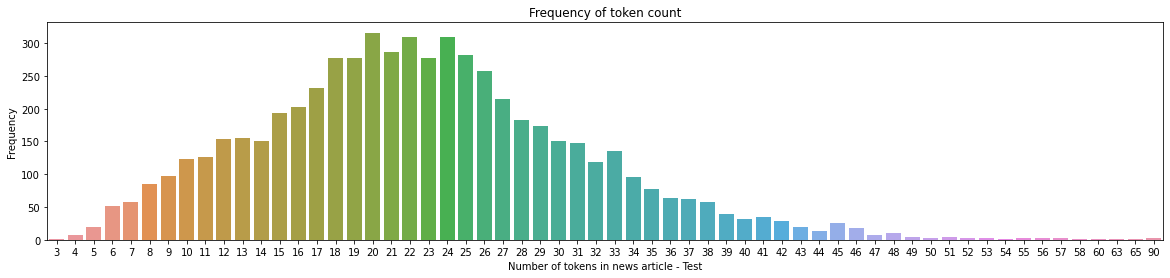

In [68]:
plt.figure(figsize=(20,4))
#sns.distplot(token_length)
sns.countplot(token_length)
plt.title("Frequency of token count")
plt.xlabel("Number of tokens in news article - Test")
plt.ylabel("Frequency")
plt.show()

In [69]:
# see the median, 95% quantile and maximum token count
print("median number of tokens = {},95% quantile = {}, maximum number of tokens = {}"\
      .format(np.median(token_length),np.quantile(token_length,0.95),np.max(token_length)))

median number of tokens = 22.0,95% quantile = 38.0, maximum number of tokens = 90


In [70]:
token_length=[] # place holder to count the number of tokens in news 
for ttl in train_data.text:
  tokens = tokenizer.encode(ttl, max_length=90, truncation=True)
  token_length.append(len(tokens)) # list of token count of each news title

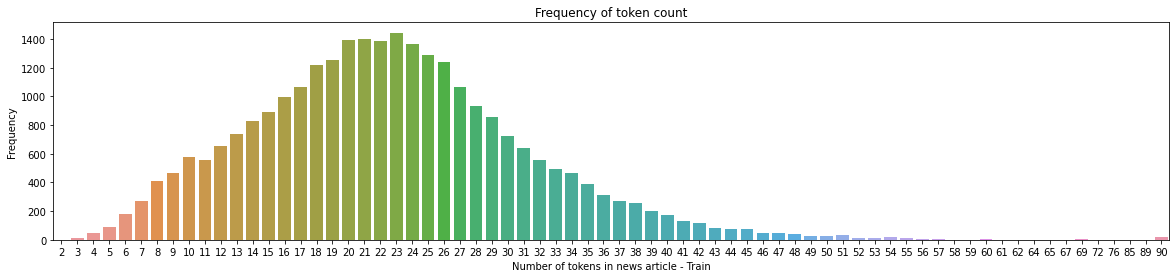

In [71]:
plt.figure(figsize=(20,4))
#sns.distplot(token_length)
sns.countplot(token_length)
plt.title("Frequency of token count")
plt.xlabel("Number of tokens in news article - Train")
plt.ylabel("Frequency")
plt.show()

In [72]:
# see the median, 95% quantile and maximum token count
print("median number of tokens = {},95% quantile = {}, maximum number of tokens = {}"\
      .format(np.median(token_length),np.quantile(token_length,0.95),np.max(token_length)))

median number of tokens = 22.0,95% quantile = 38.0, maximum number of tokens = 90


To be safe, we can set the maximum length as 50. But we can also set a lesser number as the majority of token counts are below 35.

In [73]:
n_class

33

In [74]:
MAX_SEQ_LENGTH = 50

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inp_segment = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_segment_ids")
inputs = [inp_id, inp_mask, inp_segment]

hidden_state = transformers.TFBertModel.from_pretrained('bert-base-uncased')(inputs)
pooled_output = hidden_state[1]
dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)
output = tf.keras.layers.Dense(n_class, activation='softmax')(drop2)

bert_model = tf.keras.Model(inputs=inputs, outputs=output)
bert_model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5, 
                                           epsilon=1e-08), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

bert_model.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 50)]         0           []                               
                                                                                                  
 bert_segment_ids (InputLayer)  [(None, 50)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['bert_input_ids[0][0]',         
                                thPoolingAndCrossAt               'bert_input_masks[0][0]',   

## BERT Input features


In [75]:
train_features_ids, train_features_masks, train_features_segments = create_bert_input_features(tokenizer, 
                                                                                               train_data['text'], 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)
val_features_ids, val_features_masks, val_features_segments = create_bert_input_features(tokenizer, 
                                                                                         validate_data['text'], 
                                                                                         max_seq_length=MAX_SEQ_LENGTH)
print('Train Features:', train_features_ids.shape, train_features_masks.shape, train_features_segments.shape)
print('Val Features:', val_features_ids.shape, val_features_masks.shape, val_features_segments.shape)

Converting docs to features: 100%|██████████| 5989/5989 [00:03<00:00, 1660.37it/s]

Train Features: (27946, 50) (27946, 50) (27946, 50)
Val Features: (5989, 50) (5989, 50) (5989, 50)


In [76]:
EPOCH = 4
Batch_size = 16

In [77]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)
history_bert = bert_model.fit([train_features_ids, 
           train_features_masks, 
           train_features_segments], train_data['CategoryId'], 
          validation_data=([val_features_ids, 
                            val_features_masks, 
                            val_features_segments], validate_data['CategoryId']),
          epochs=EPOCH, 
          batch_size=Batch_size, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/4
1747/1747 [==============================] - 272s 147ms/step - loss: 1.9630 - accuracy: 0.5264 - val_loss: 1.4194 - val_accuracy: 0.6432
Epoch 2/4
1747/1747 [==============================] - 254s 146ms/step - loss: 1.2936 - accuracy: 0.6790 - val_loss: 1.3183 - val_accuracy: 0.6595
Epoch 3/4
1747/1747 [==============================] - 254s 145ms/step - loss: 0.9671 - accuracy: 0.7571 - val_loss: 1.2948 - val_accuracy: 0.6721
Epoch 4/4
1747/1747 [==============================] - 254s 145ms/step - loss: 0.7197 - accuracy: 0.8173 - val_loss: 1.4146 - val_accuracy: 0.6676


In [78]:
bert_model.save_weights('bert_ft_wts.h5')

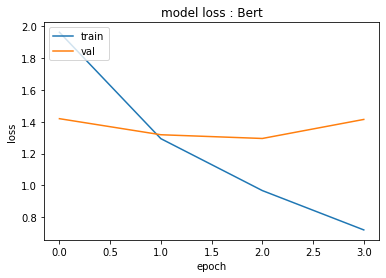

In [79]:
#print(history_bert.history.keys())
#train_acc,_,_=bert_model.evaluate(X_train,y_train,verbose=0)
#test_acc,_,_=base_model.evaluate(X_test,y_test,verbose=0)
#print('Train: {}, Test : {}' .format(train_acc,test_acc))
# "Loss"
plt.plot(history_bert.history['loss'],label ='train')
plt.plot(history_bert.history['val_loss'],label ='val')
plt.title('model loss : Bert')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

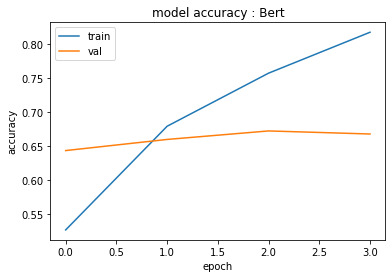

In [80]:
# "Acc"
plt.plot(history_bert.history['accuracy'],label ='train')
plt.plot(history_bert.history['val_accuracy'],label ='val')
plt.title('model accuracy : Bert')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Test prediction Bert

In [81]:
test_features_ids, test_features_masks, test_features_segments = create_bert_input_features(tokenizer, 
                                                                                               test_data['text'], 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

print('Test Features:', test_features_ids.shape, test_features_masks.shape, test_features_segments.shape)

Converting docs to features: 100%|██████████| 5989/5989 [00:03<00:00, 1630.50it/s]


Test Features: (5989, 50) (5989, 50) (5989, 50)


In [82]:
test_bert_pred = bert_model.predict([test_features_ids, test_features_masks, test_features_segments], verbose=0)

In [83]:
test_bert_pred.shape

(5989, 33)

In [84]:
test_bert_predict_class = np.argmax(test_bert_pred, axis=1)
test_bert_predict_class = test_bert_predict_class.tolist()
#test_bert_predict_class

In [85]:
print("Accuracy: %.2f%%" % (accuracy_score(test_data['CategoryId'], test_bert_predict_class)*100))
print(classification_report(test_data['CategoryId'], test_bert_predict_class))
bert_cm = confusion_matrix(test_data['CategoryId'], test_bert_predict_class)

Accuracy: 67.21%
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       111
           1       0.48      0.47      0.47       146
           2       0.42      0.59      0.49       174
           3       0.50      0.57      0.53        30
           4       0.50      0.39      0.44       150
           5       0.50      0.48      0.49        97
           6       0.81      0.83      0.82       108
           7       0.58      0.32      0.41        44
           8       0.69      0.75      0.72       469
           9       0.49      0.64      0.55       112
          10       0.00      0.00      0.00        42
          11       0.75      0.84      0.79       271
          12       0.24      0.14      0.17        37
          13       0.76      0.69      0.72       115
          14       0.34      0.36      0.35       104
          15       0.45      0.32      0.38        31
          16       0.47      0.66      0.55        85
          

In [86]:
id_to_category

{0: 'ARTS & CULTURE',
 1: 'BLACK VOICES',
 2: 'BUSINESS',
 3: 'COLLEGE',
 4: 'COMEDY',
 5: 'CRIME',
 6: 'DIVORCE',
 7: 'EDUCATION',
 8: 'ENTERTAINMENT',
 9: 'ENVIRONMENT',
 10: 'FIFTY',
 11: 'FOOD & DRINK',
 12: 'GOOD NEWS',
 13: 'HOME & LIVING',
 14: 'IMPACT',
 15: 'LATINO VOICES',
 16: 'MEDIA',
 17: 'MONEY',
 18: 'PARENTING',
 19: 'POLITICS',
 20: 'QUEER VOICES',
 21: 'RELIGION',
 22: 'SCIENCE',
 23: 'SPORTS',
 24: 'STYLE & BEAUTY',
 25: 'TECH',
 26: 'TRAVEL',
 27: 'WEDDINGS',
 28: 'WEIRD NEWS',
 29: 'WELLNESS',
 30: 'WOMEN',
 31: 'WORLD NEWS',
 32: 'WORLDPOST'}

In [87]:
len(id_to_category)

33

In [88]:
target_list = []
for i in range(len(id_to_category)):
    target_list.append(id_to_category[i])
target_list

['ARTS & CULTURE',
 'BLACK VOICES',
 'BUSINESS',
 'COLLEGE',
 'COMEDY',
 'CRIME',
 'DIVORCE',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FIFTY',
 'FOOD & DRINK',
 'GOOD NEWS',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTING',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE & BEAUTY',
 'TECH',
 'TRAVEL',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS',
 'WORLDPOST']

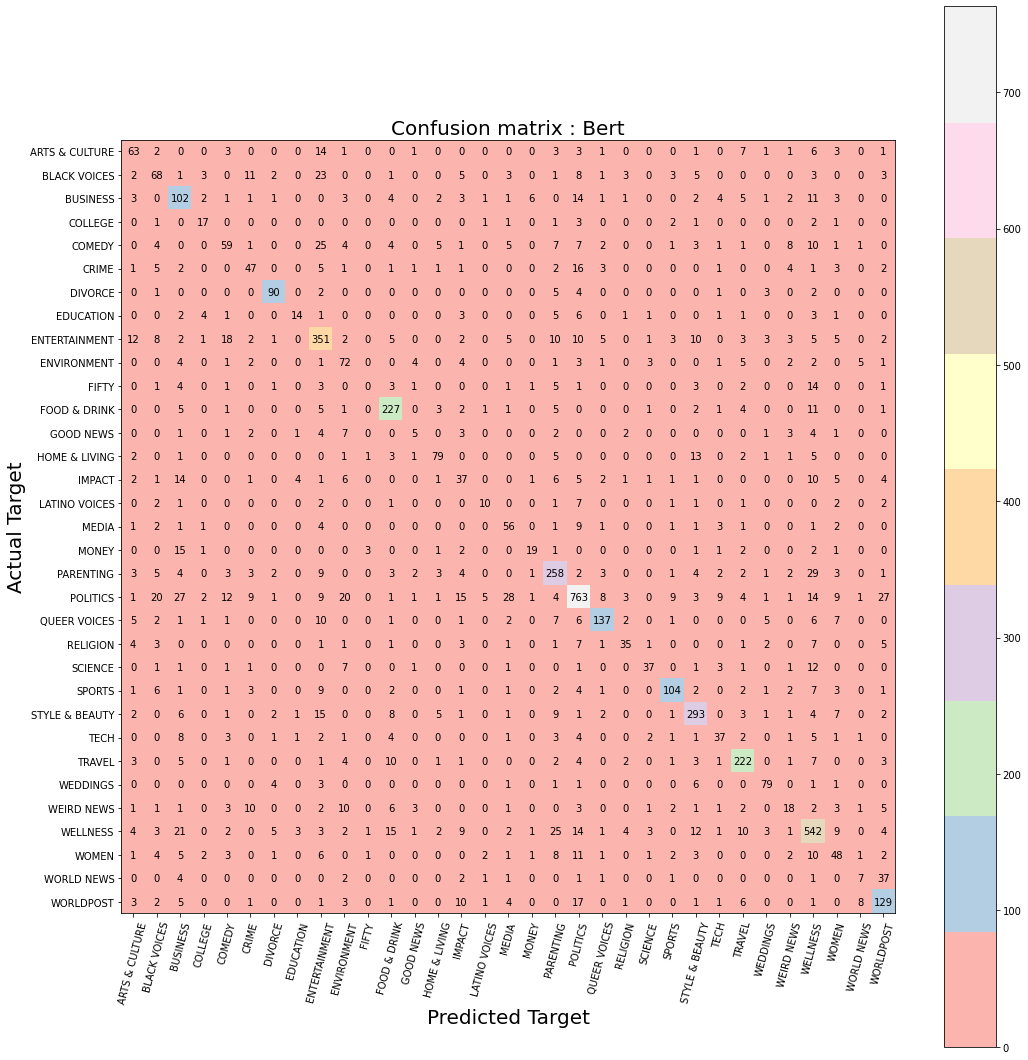

In [89]:
plt.figure(figsize=(15,15))
plt.imshow(bert_cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix : Bert', size = 20)
plt.colorbar()
tick_marks = np.arange(len(target_list))
plt.xticks(tick_marks, target_list, rotation=75, size = 10)
plt.yticks(tick_marks, target_list, size = 10)
plt.tight_layout()
plt.ylabel('Actual Target', size = 20)
plt.xlabel('Predicted Target', size = 20)
width, height = bert_cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(bert_cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

### 5.2 Using DistilBERT pretrained model : as embedding layer followed by multiclass classification using shallow Neural Network

In [90]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [91]:
MAX_SEQ_LENGTH = 50

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inputs = [inp_id, inp_mask]

hidden_state = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')(inputs)[0]
pooled_output = hidden_state[:, 0]    
dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)
output = tf.keras.layers.Dense(n_class, activation='softmax')(drop2)


distbert_model = tf.keras.Model(inputs=inputs, outputs=output)
distbert_model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5, 
                                           epsilon=1e-08), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

distbert_model.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 50)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['bert_input_ids[0][0]',         
 BertModel)                     ast_hidden_state=(N               'bert_input_masks[0][0]']       
                                one, 50, 768),                                                    
                                 hidden_states=None                                         

## DistilBERT Input features


In [92]:
train_features_ids, train_features_masks = create_dist_bert_input_features(tokenizer, 
                                                                                               train_data['text'], 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)
val_features_ids, val_features_masks = create_dist_bert_input_features(tokenizer, 
                                                                                         validate_data['text'], 
                                                                                         max_seq_length=MAX_SEQ_LENGTH)
#test_features = create_bert_input_features(tokenizer, test_reviews, max_seq_length=MAX_SEQ_LENGTH)
print('Train Features:', train_features_ids.shape, train_features_masks.shape)
print('Val Features:', val_features_ids.shape, val_features_masks.shape)

Converting docs to features: 100%|██████████| 5989/5989 [00:04<00:00, 1484.31it/s]

Train Features: (27946, 50) (27946, 50)
Val Features: (5989, 50) (5989, 50)


In [93]:
EPOCH = 6
Batch_size = 16

In [94]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)
history_distbert = distbert_model.fit([train_features_ids, 
           train_features_masks], train_data['CategoryId'], 
          validation_data=([val_features_ids, 
                            val_features_masks], validate_data['CategoryId']),
          epochs=EPOCH, 
          batch_size=Batch_size, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/6
1747/1747 [==============================] - 147s 80ms/step - loss: 1.8315 - accuracy: 0.5511 - val_loss: 1.3562 - val_accuracy: 0.6517
Epoch 2/6
1747/1747 [==============================] - 138s 79ms/step - loss: 1.2296 - accuracy: 0.6876 - val_loss: 1.2974 - val_accuracy: 0.6622
Epoch 3/6
1747/1747 [==============================] - 138s 79ms/step - loss: 0.9401 - accuracy: 0.7564 - val_loss: 1.3334 - val_accuracy: 0.6666
Epoch 4/6
1747/1747 [==============================] - 138s 79ms/step - loss: 0.6994 - accuracy: 0.8185 - val_loss: 1.4749 - val_accuracy: 0.6595
Epoch 4: early stopping


In [95]:
distbert_model.save_weights('distillbert_ft_wts.h5')

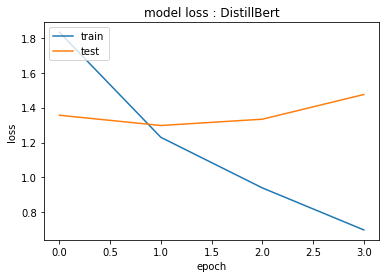

In [96]:
#print(history_bert.history.keys())
#train_acc,_,_=bert_model.evaluate(X_train,y_train,verbose=0)
#test_acc,_,_=base_model.evaluate(X_test,y_test,verbose=0)
#print('Train: {}, Test : {}' .format(train_acc,test_acc))
# "Loss"
plt.plot(history_distbert.history['loss'],label ='train')
plt.plot(history_distbert.history['val_loss'],label ='test')
plt.title('model loss : DistillBert')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

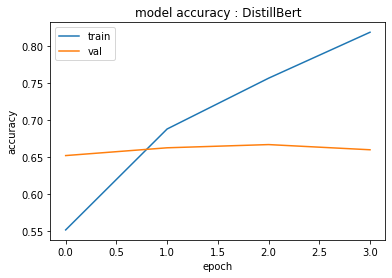

In [97]:
# "Acc"
plt.plot(history_distbert.history['accuracy'],label ='train')
plt.plot(history_distbert.history['val_accuracy'],label ='val')
plt.title('model accuracy : DistillBert')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Test prediction DistillBert

In [98]:
test_features_ids, test_features_masks = create_dist_bert_input_features(tokenizer, 
                                                                                               test_data['text'], 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

print('Test Features:', test_features_ids.shape, test_features_masks.shape)

Converting docs to features: 100%|██████████| 5989/5989 [00:03<00:00, 1585.65it/s]


Test Features: (5989, 50) (5989, 50)


In [99]:
test_dist_bert_pred = distbert_model.predict([test_features_ids, test_features_masks], verbose=0)

In [100]:
test_dist_bert_pred.shape

(5989, 33)

In [101]:
test_dist_bert_predict_class = np.argmax(test_dist_bert_pred, axis=1)
test_dist_bert_predict_class = test_dist_bert_predict_class.tolist()
#test_dist_bert_predict_class

In [102]:
print("Accuracy: %.2f%%" % (accuracy_score(test_data['CategoryId'], test_dist_bert_predict_class)*100))
print(classification_report(test_data['CategoryId'], test_dist_bert_predict_class))
dist_bert_cm = confusion_matrix(test_data['CategoryId'], test_dist_bert_predict_class)

Accuracy: 66.10%
              precision    recall  f1-score   support

           0       0.51      0.59      0.55       111
           1       0.72      0.28      0.40       146
           2       0.42      0.53      0.47       174
           3       0.43      0.60      0.50        30
           4       0.46      0.39      0.43       150
           5       0.42      0.57      0.48        97
           6       0.86      0.77      0.81       108
           7       0.54      0.32      0.40        44
           8       0.72      0.67      0.69       469
           9       0.52      0.64      0.57       112
          10       0.00      0.00      0.00        42
          11       0.73      0.87      0.79       271
          12       0.17      0.08      0.11        37
          13       0.58      0.75      0.65       115
          14       0.29      0.34      0.31       104
          15       0.44      0.23      0.30        31
          16       0.52      0.53      0.53        85
          

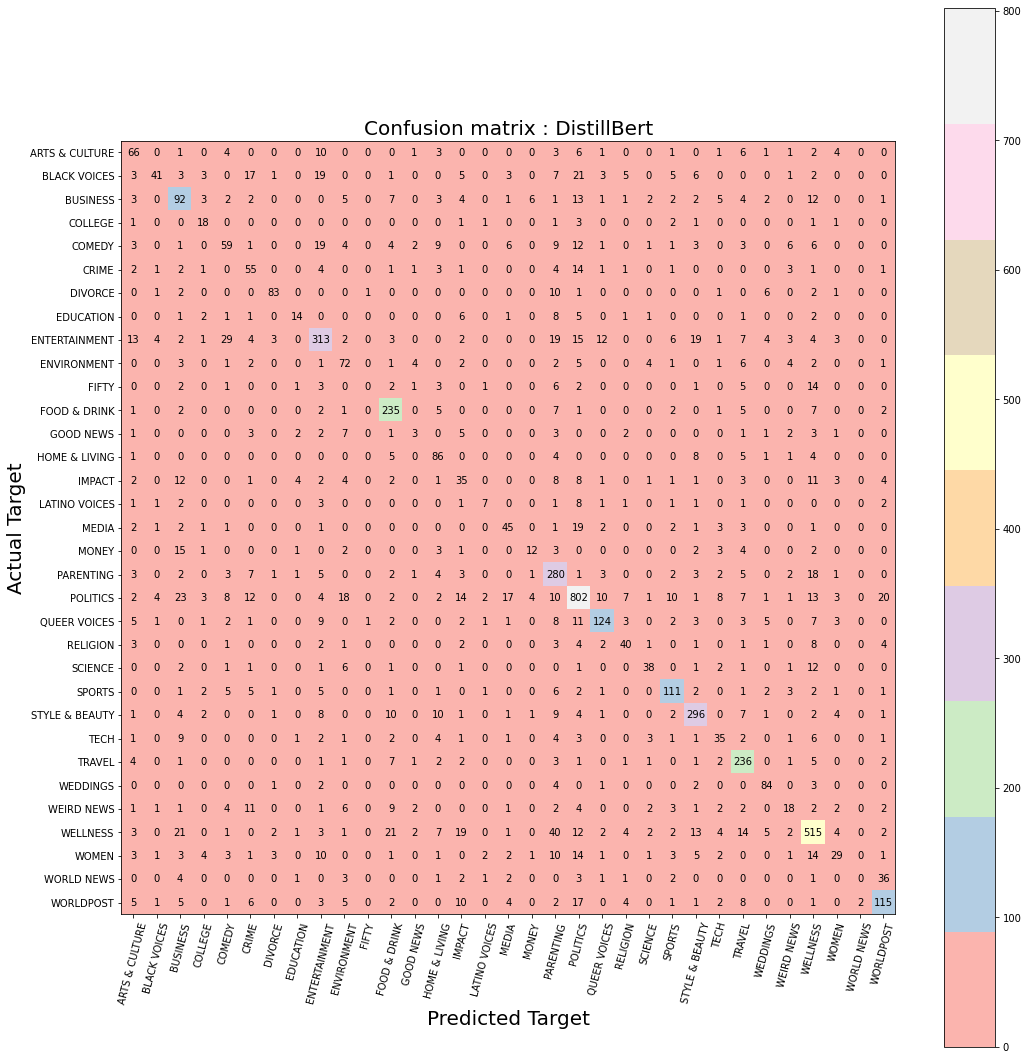

In [103]:
plt.figure(figsize=(15,15))
plt.imshow(dist_bert_cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix : DistillBert', size = 20)
plt.colorbar()
tick_marks = np.arange(len(target_list))
plt.xticks(tick_marks, target_list, rotation=75, size = 10)
plt.yticks(tick_marks, target_list, size = 10)
plt.tight_layout()
plt.ylabel('Actual Target', size = 20)
plt.xlabel('Predicted Target', size = 20)
width, height = dist_bert_cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(dist_bert_cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

<a id=section7></a>
## 6. Conclusion:





- **Original dataset contains 200853 text rows** and **starified sample of 40000 rows** is selected for model building purposes.

- **Eager execution** of tensorflow has been chosen.

- **Sequence length of 50** considered based on **tokens distribution after preprocessing, cleaning and removing english 'stopwords'**.

- **'Sparse-categorical-crossentropy'** used for **loss calculation** as we have **target index (integer)** to predict.

- Performance of models are summarized below,

<img src="https://github.com/pathakchiranjit/Natural-languge-Processing/blob/main/pics/model_eval.png?raw=true" align='left'><br/>



<a id=section7></a>
## 7. Actionable Insights:





- If we really need a **faster inference speed** but can **compromise** few-% on prediction metrics, **DistilBERT** is a starting reasonable choice.

- If we are looking for the best prediction metrics, we should be better off with Facebook’s **RoBERTa**.

- Theoratically, **XLNet’s** permutation based training should handle dependencies well, and might work better in longer-run.

- However, **Google’s BERT** does serve a good baseline to work with and if you don't have any of the above critical needs, you can keep your systems running with **BERT**.

- **Model may improve** further if the complete dataset will be used for **training**.

<a id=section8></a>
## 8. Limitation of the study:





- The study has been **carried out over 40000 text and 33 nos class dataset** and  **some of the SOTA pre-trained models for NLP** as an **embedding**. Hence, with **other available models** and **dataset** the **model performance might be different**.


<img src="https://github.com/pathakchiranjit/Natural-languge-Processing/blob/main/pics/end-11.jpg?raw=true" align='left'><br/>